# Age replacement policy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from relife.lifetime_model import Gompertz

In [2]:
a0 = np.array([15, 20, 25])
cp = 10
cf = np.array([900, 500, 100])
discounting_rate = 0.04
model = Gompertz(shape=0.00391, rate=0.0758)

In [3]:
from relife.policy import AgeReplacementPolicy

ar_policy = AgeReplacementPolicy(model, cf=cf, cp=cp, a0=a0, discounting_rate=discounting_rate).optimize()
print("Optimal ages of replacement (per asset)", ar_policy.ar)
print("Time before first replacement (per asset)", ar_policy.tr1)

Optimal ages of replacement (per asset) [20.91316269 25.54310597 41.59988035]
Time before first replacement (per asset) [ 5.91316269  5.54310597 16.59988035]


In [4]:
from relife.policy import OneCycleAgeReplacementPolicy

onecycle_ar_policy = OneCycleAgeReplacementPolicy(model, cf=cf, cp=cp, a0=a0, discounting_rate=discounting_rate).optimize()
print("Optimal ages of replacement (per asset), on one cycle", onecycle_ar_policy.ar)
print("Time before replacement (per asset), on one cycle", onecycle_ar_policy.tr)

Optimal ages of replacement (per asset), on one cycle [15.61079092 20.87305772 38.85510169]
Time before replacement (per asset), on one cycle [ 0.61079092  0.87305772 13.85510169]


<Axes: title={'center': 'Probability density function'}, xlabel='t', ylabel='$f(t)$'>

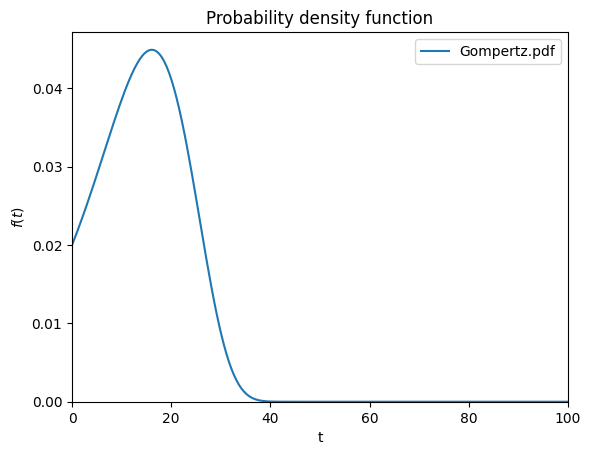

In [5]:
model = Gompertz(shape=0.2, rate=0.1)
model.plot.pdf(end_time=100)

In [6]:
ar_policy = AgeReplacementPolicy(model, cf=cf, cp=cp, a0=a0, discounting_rate=discounting_rate).optimize()
optimal_ar = ar_policy.ar
print(optimal_ar)

[3.11636797 4.10385822 8.61449029]


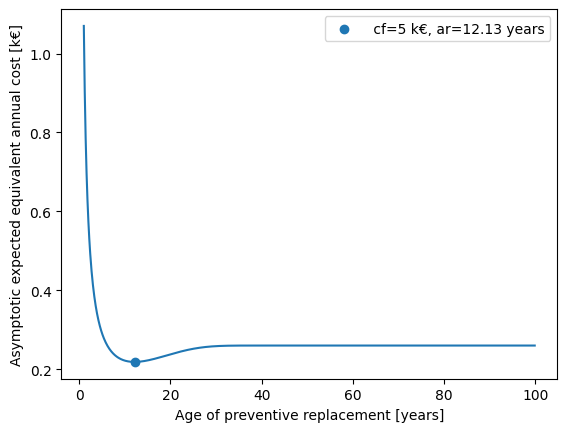

asymptotic expected equivalent annual cost with optimal ar : 0.22


In [7]:
cf = 5
cp = 1
discounting_rate = 0.05
ar = np.arange(1, 100, 0.1)
nb_assets = ar.shape[0]

parametrized_ar_policy = AgeReplacementPolicy(model, cf=cf, cp=cp, ar=ar, discounting_rate=discounting_rate)
za = parametrized_ar_policy.asymptotic_expected_equivalent_annual_cost()

ar_policy = AgeReplacementPolicy(model, cf=cf, cp=cp, discounting_rate=discounting_rate).optimize()
ar_opt = ar_policy.ar  # optimal ar
za_opt = ar_policy.asymptotic_expected_equivalent_annual_cost()
plt.plot(ar, za)
plt.scatter(ar_opt, za_opt, label=f" cf={cf} k€, ar={np.round(ar_opt, 2).item()} years")
plt.xlabel("Age of preventive replacement [years]")
plt.ylabel("Asymptotic expected equivalent annual cost [k€]")
plt.legend()
plt.show()
print("asymptotic expected equivalent annual cost with optimal ar :", np.round(za_opt, 2))

## Consequences with optimal age replacement

In [8]:
nb_years=100
timeline, total_cost = ar_policy.expected_net_present_value(nb_years, nb_steps=nb_years)
total_cost_per_year = np.diff(total_cost, prepend=0)

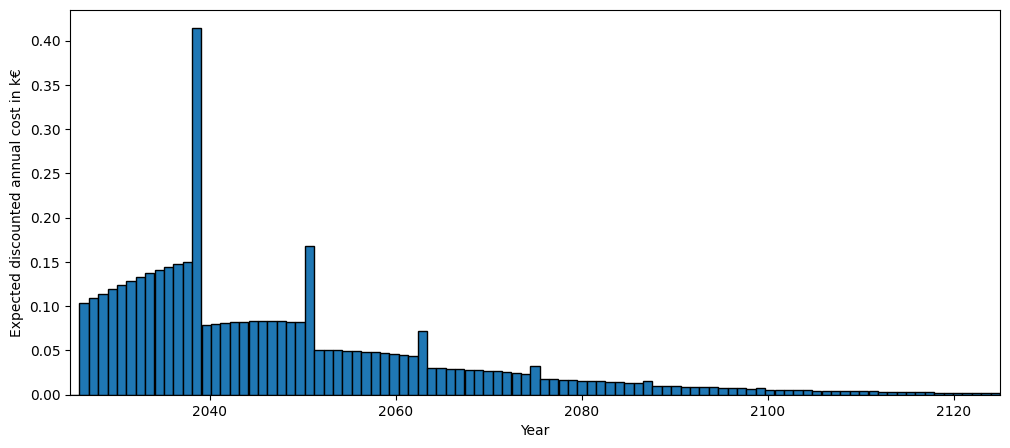

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(timeline + 2025, total_cost_per_year, width=1., align="edge", edgecolor="black")
ax.set_xlabel("Year")
ax.set_xlim(left=2025, right=2025 + nb_years)
ax.set_ylabel("Expected discounted annual cost in k€")
plt.show()

In [10]:
timeline, nb_replacements, nb_failures = ar_policy.annual_number_of_replacements(nb_years, upon_failure=True)

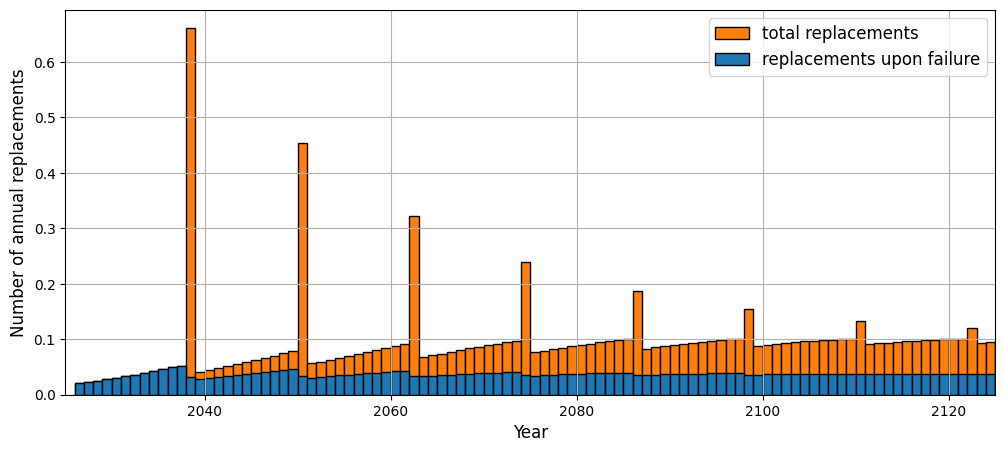

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(timeline + 2025, nb_replacements, align="edge", width=1., label="total replacements", color="C1", edgecolor="black")
ax.bar(timeline + 2025, nb_failures, align="edge", width=1., label="replacements upon failure", color="C0", edgecolor="black")
ax.set_ylabel("Number of annual replacements", fontsize="large")
ax.set_xlabel("Year", fontsize="large")
ax.set_ylim(bottom=0)
ax.set_xlim(left=2025, right=2025 + nb_years)
ax.legend(loc="upper right", fontsize="large")
plt.grid(True)
plt.show()

## Consequences with *a priori* age replacement fixed at 25 years

In [12]:
ar = 25
sub_opti_ar_policy = AgeReplacementPolicy(model, cf=cf, cp=cp, ar=25, discounting_rate=discounting_rate)

timeline, total_cost = sub_opti_ar_policy.expected_net_present_value(nb_years, nb_steps=nb_years)
total_cost_per_year = np.diff(total_cost, prepend=0)

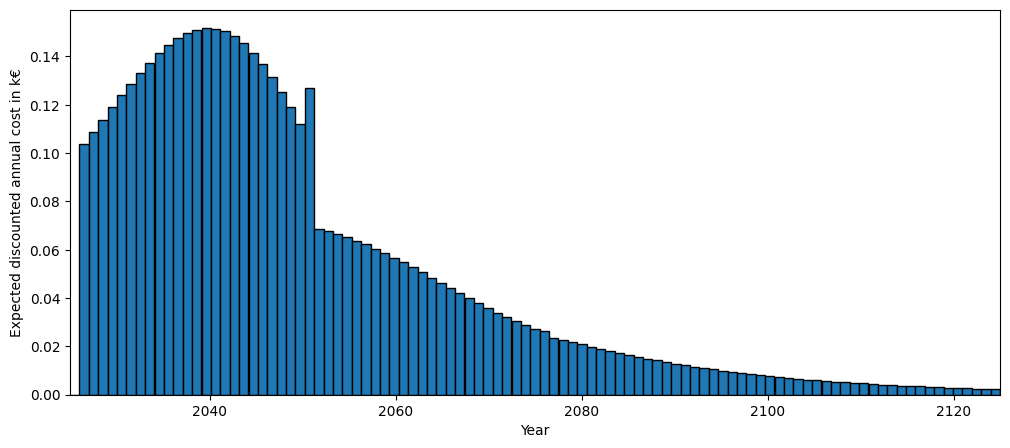

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(timeline + 2025, total_cost_per_year, width=1., align="edge", edgecolor="black")
ax.set_xlabel("Year")
ax.set_xlim(left=2025, right=2025 + nb_years)
ax.set_ylabel("Expected discounted annual cost in k€")
plt.show()

In [14]:
timeline, nb_replacements, nb_failures = sub_opti_ar_policy.annual_number_of_replacements(nb_years, upon_failure=True)

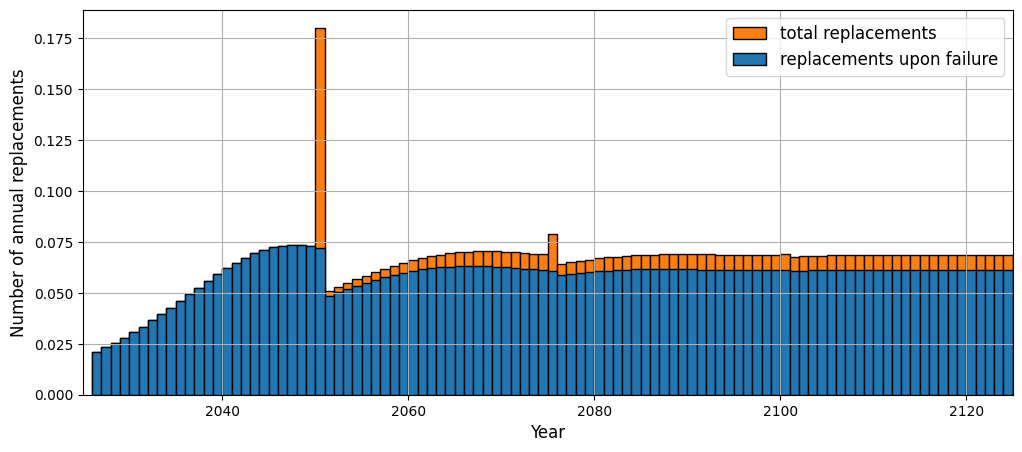

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(timeline + 2025, nb_replacements, align="edge", width=1., label="total replacements", color="C1", edgecolor="black")
ax.bar(timeline + 2025, nb_failures, align="edge", width=1., label="replacements upon failure", color="C0", edgecolor="black")
ax.set_ylabel("Number of annual replacements", fontsize="large")
ax.set_xlabel("Year", fontsize="large")
ax.set_ylim(bottom=0)
ax.set_xlim(left=2025, right=2025 + nb_years)
ax.legend(loc="upper right", fontsize="large")
plt.grid(True)
plt.show()